# NAME - OMKAR DIXIT

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

In [220]:
big_mart_data = pd.read_csv("Train.csv")
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA

In [221]:
big_mart_data.shape

(8523, 12)

In [222]:
big_mart_data.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [223]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Univariate Analysis

In [224]:
sns.set()

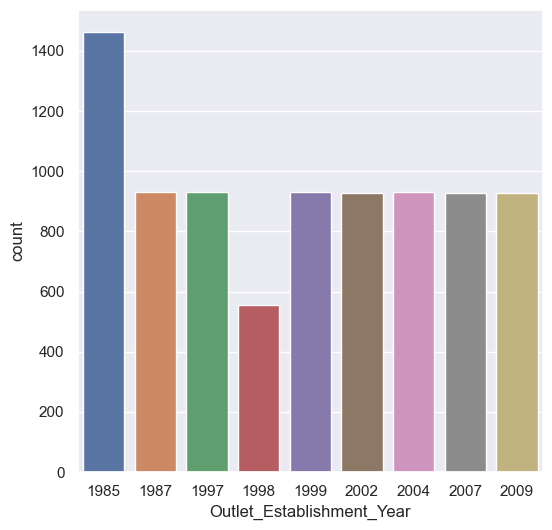

In [225]:
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Establishment_Year',data = big_mart_data)
plt.show()

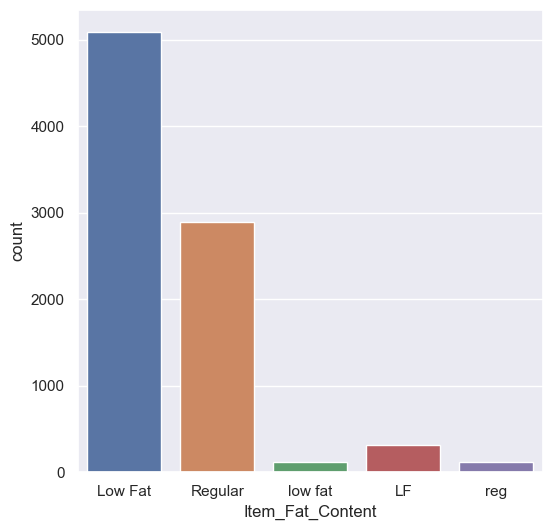

In [226]:
plt.figure(figsize = (6,6))
sns.countplot(x ='Item_Fat_Content',data = big_mart_data)
plt.show()

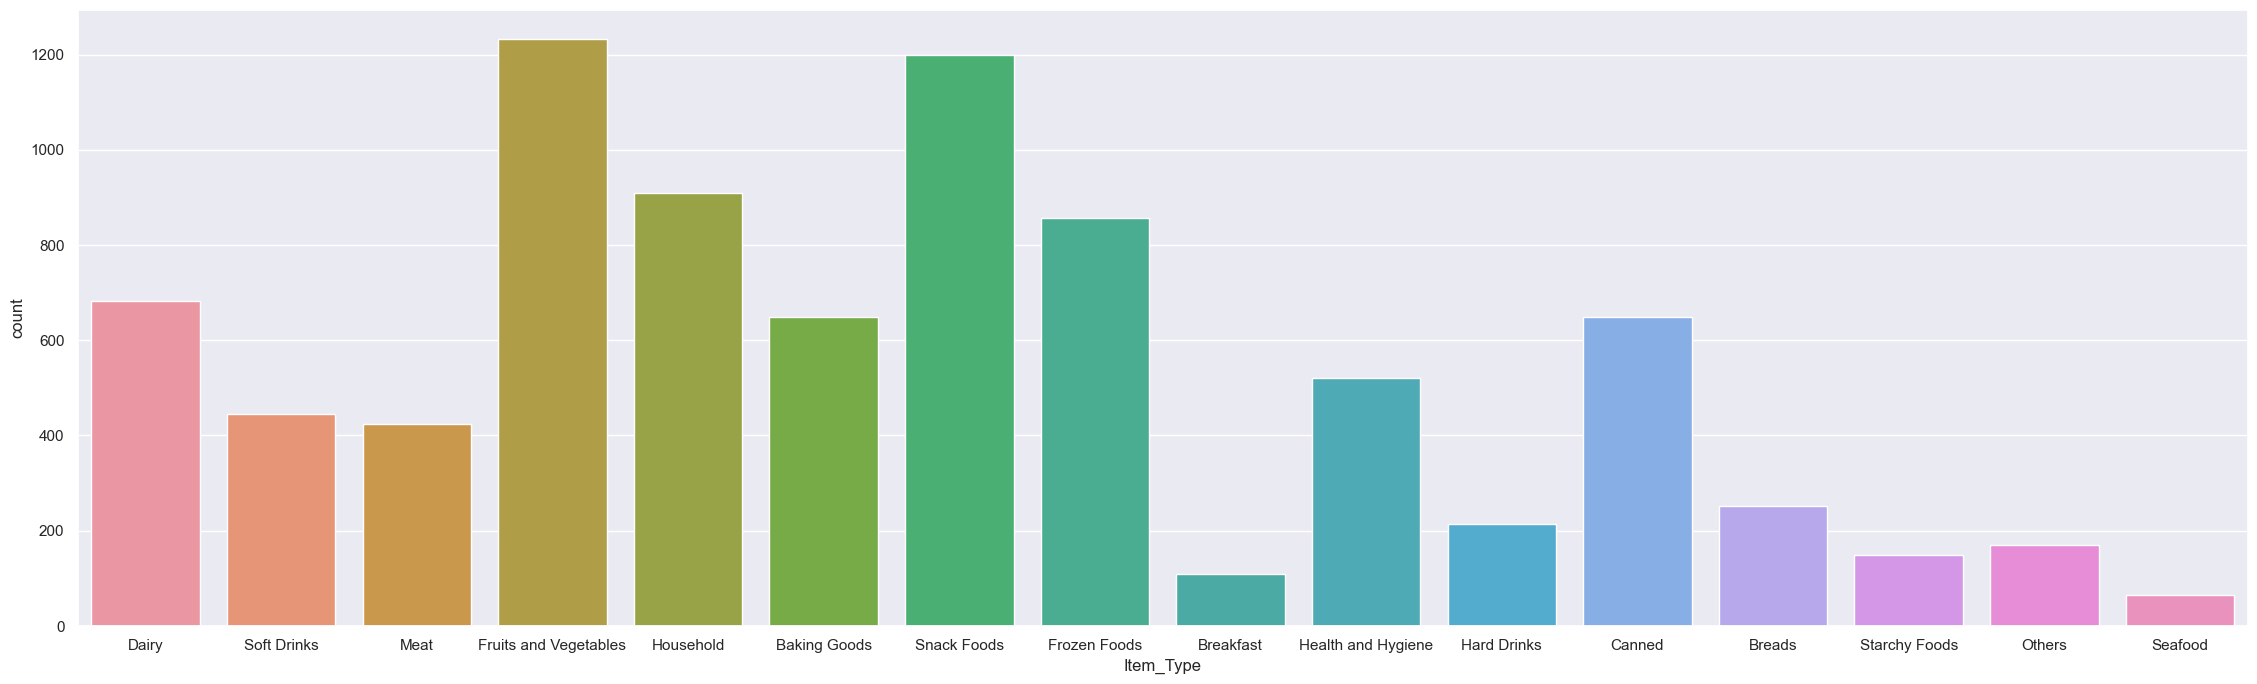

In [227]:
plt.figure(figsize = (28,8))
sns.countplot(x ='Item_Type',data = big_mart_data)
plt.show()

In [228]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [229]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [230]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Bivariate Analysis with respect to Sales

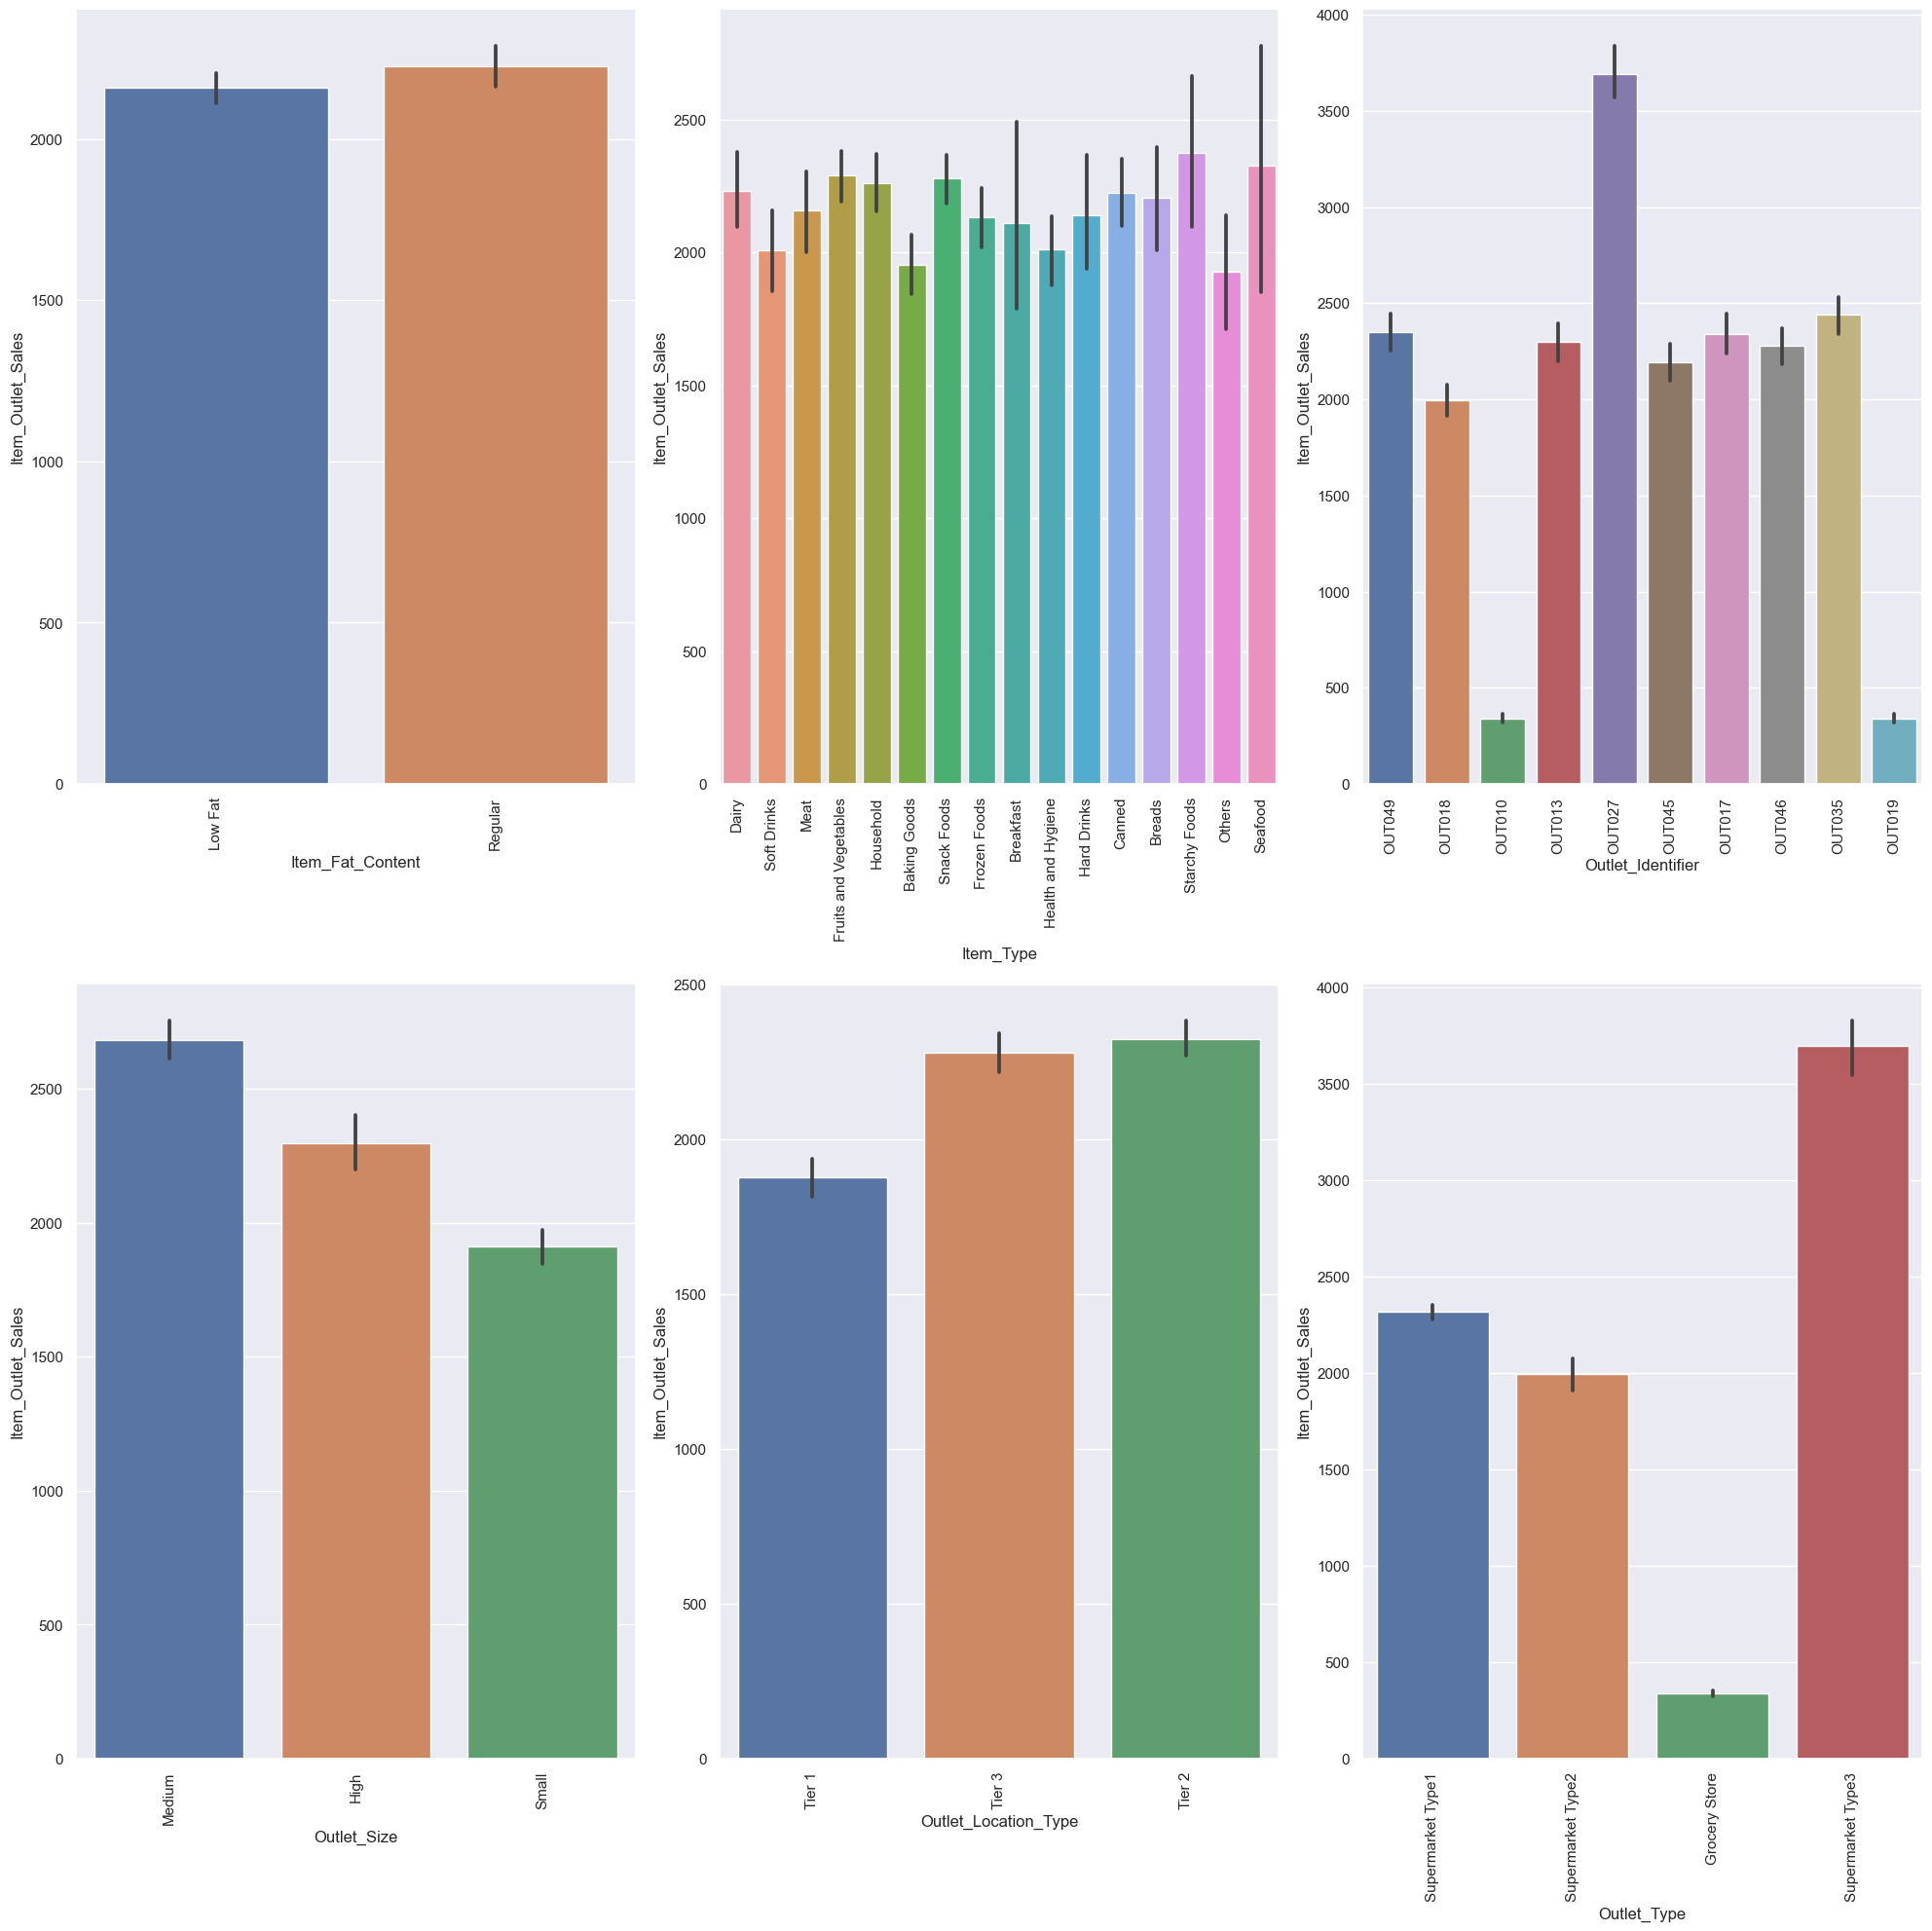

In [231]:

cat_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 
            'Outlet_Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Item_Outlet_Sales', data=big_mart_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


fig.tight_layout()

plt.show()

# Handling missing values

In [232]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [233]:
big_mart_data["Item_Weight"].mean()

12.857645184136183

In [234]:
# filling missing values with mean
big_mart_data["Item_Weight"].fillna(big_mart_data["Item_Weight"].mean(),inplace = True)

In [235]:
#Replacing the missing values in "OutletSize" with mode
#code creates a pivot table that shows the mode (most frequent value) of the 'Outlet_Size' column for each unique 'Outlet_Type' in the big_mart_data
from scipy.stats import mode
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x : mode(x.dropna()).mode[0]))

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_8560\47978817.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x : mode(x.dropna()).mode[0]))
C:\Users\OMKAR\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [236]:
print(mode_of_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [237]:
missing_values = big_mart_data["Outlet_Size"].isnull()

In [238]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [239]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size.loc[x])

In [240]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Label Encoding

In [241]:
encoder = LabelEncoder()

In [242]:
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

In [243]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and target

In [244]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales',axis = 1)
y = big_mart_data["Item_Outlet_Sales"]

In [245]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [246]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Trainning

# XGBoost Regressor

In [248]:
model = XGBRegressor(n_estimators = 750,learning_rate = 0.007)

In [249]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.007, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [250]:
# trainning data prediction
train_data_prediction = model.predict(X_train)

In [251]:
# R squared value
r2_train = metrics.r2_score(y_train,train_data_prediction)
print("R Squared Value : ",r2_train)

R Squared Value :  0.6893759966475428


In [252]:
# test data prediction
test_data_prediction = model.predict(X_test)

In [253]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Value : ",r2_test)

R Squared Value :  0.5799329116086809


# Liner Regression

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X_train, X_test, y_train, and y_test are your training and test data
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


R-squared: 0.48912987193626367


# Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Assuming X_train, X_test, y_train, and y_test are your training and test data
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)



R-squared: 0.6699504177563058


# Now testing our data on unknown OutletSales Dataset

In [255]:
big_mart_test_data = pd.read_csv("Test.csv")

In [256]:
big_mart_test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Handling Missing Values (Same done for trainning data)

In [257]:
big_mart_test_data["Item_Weight"].fillna(big_mart_test_data["Item_Weight"].mean(),inplace=True)
big_mart_test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [258]:
# Mode 
mode_of_test_outlet_size = big_mart_test_data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x : mode(x.dropna()).mode[0]))
print(mode_of_test_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


C:\Users\OMKAR\AppData\Local\Temp\ipykernel_8560\2299942702.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_of_test_outlet_size = big_mart_test_data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x : mode(x.dropna()).mode[0]))
C:\Users\OMKAR\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [259]:
missing_values_test = big_mart_test_data["Outlet_Size"].isnull()
print(missing_values_test)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [260]:
big_mart_test_data.loc[missing_values_test, 'Outlet_Size'] = big_mart_test_data.loc[missing_values_test, 'Outlet_Type'].apply(lambda x: mode_of_test_outlet_size.loc[x])

In [261]:
# Checking if there is any missing value in our dataset
big_mart_test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

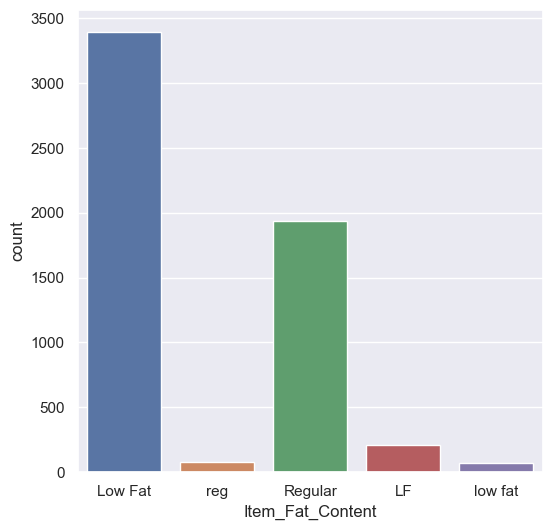

In [262]:
plt.figure(figsize = (6,6))
sns.countplot(x ='Item_Fat_Content',data = big_mart_test_data)
plt.show()

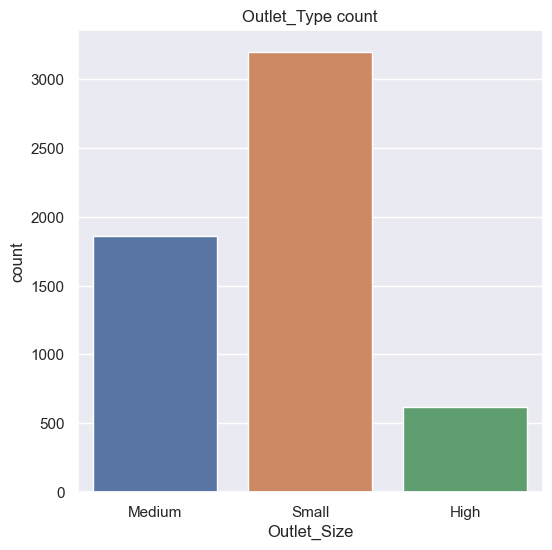

In [263]:
# OutletSize
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Size',data = big_mart_test_data)
plt.title('Outlet_Type count')
plt.show()

In [264]:
big_mart_test_data.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
big_mart_test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [265]:
encoder = LabelEncoder()
big_mart_test_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_test_data['Item_Fat_Content'])
big_mart_test_data['Item_Type'] = encoder.fit_transform(big_mart_test_data['Item_Type'])
big_mart_test_data['Outlet_Size'] = encoder.fit_transform(big_mart_test_data['Outlet_Size'])
big_mart_test_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_test_data['Outlet_Location_Type'])
big_mart_test_data['Outlet_Type'] = encoder.fit_transform(big_mart_test_data['Outlet_Type'])
big_mart_test_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_test_data['Outlet_Identifier'])
big_mart_test_data['Item_Identifier'] = encoder.fit_transform(big_mart_test_data['Item_Identifier'])

# Fitting the trainning data and predicting the values for test data

In [266]:
model.fit(X,y)
test_predictions = model.predict(big_mart_test_data)
print(test_predictions)

[1587.332  1345.8873  626.5191 ... 1875.628  3623.553  1346.2677]


In [267]:
# converting array into dataframe
#OutletSales = test_predictions 
#df = pd.DataFrame(OutletSales, columns = ['Item_Outlet=Sales'])

In [268]:
#big_mart_test_data['OutletSales'] = OutletSales
#big_mart_test_data.head()

# LR

In [269]:
model2.fit(X,y)
test_predictions = model2.predict(big_mart_test_data)
print(test_predictions)

[2035.91843196 1225.67709082 2289.74399355 ... 1758.26778778 3154.92478698
 1167.2266245 ]


# RF

In [273]:
model3.fit(X,y)
test_predictions = model2.predict(big_mart_test_data)
print(test_predictions)

[2035.91843196 1225.67709082 2289.74399355 ... 1758.26778778 3154.92478698
 1167.2266245 ]
